# 0.0 Imports 

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt


from PIL import Image

## 0.1 Loading data 

In [2]:
data_raw = pd.read_csv("data/kc_house_data.csv")

## 0.2 Helper Functions 

In [3]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

# 1.0 Data Description 

In [4]:
df1 = data_raw.copy()

## 1.1 Features


In [5]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Features**:

- id - Unique ID for each home sold

- date - Date of the home sale

- price - Price of each home sold

- bedrooms - Number of bedrooms

- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

- sqft_living - Square footage of the apartments interior living space

- sqft_lot - Square footage of the land space

- floors - Number of floors

- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

- view - An index from 0 to 4 of how good the view of the property was

- condition - An index from 1 to 5 on the condition of the apartment,

- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

- sqft_above - The square footage of the interior housing space that is above ground level

- sqft_basement - The square footage of the interior housing space that is below ground level

- yr_built - The year the house was initially built

- yr_renovated - The year of the house’s last renovation

- zipcode - What zipcode area the house is in

- lat - Lattitude

- long - Longitude

- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

## 1.2 Data Dimensions


In [6]:
print("Number of rows {}".format(df1.shape[0] ) )
print("Number of cols {}".format(df1.shape[1] ) )

Number of rows 21613
Number of cols 21


## 1.3 Data Types 

In [7]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We have to change 'date' to datetime type


In [8]:
#change type
df1['date'] = pd.to_datetime( df1['date'], format='%Y/%m/%d' )

## 1.4 Check NA 

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

don's has NA in the dataset

## 1.5 Descriptive Statistical

In [10]:
df15 = df1.drop(['date','id'], axis=1).copy()
#central tendecy mean median
ct1 = pd.DataFrame( df15.apply( np.mean) ).T
ct2 = pd.DataFrame( df15.apply( np.median) ).T

#dispersion - std,min, max , range ,skew , kurtosis 
d1 = pd.DataFrame(df15.apply(np.std)).T
d2 = pd.DataFrame(df15.apply(min)).T
d3 = pd.DataFrame(df15.apply(max)).T
d4 = pd.DataFrame(df15.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(df15.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df15.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()

m.columns = ['Atrib.','min','max','range','mean','median','std','skew','kurtosis']
m

,Atrib.,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00000,7700000.00000,7625000.00000,540088.14177,450000.00000,367118.70318,4.02407,34.58554
1,bedrooms,0.00000,33.00000,33.00000,3.37084,3.00000,0.93004,1.97430,49.06365
2,bathrooms,0.00000,8.00000,8.00000,2.11476,2.25000,0.77015,0.51111,1.27990
3,sqft_living,290.00000,13540.00000,13250.00000,2079.89974,1910.00000,918.41965,1.47156,5.24309
4,sqft_lot,520.00000,1651359.00000,1650839.00000,15106.96757,7618.00000,41419.55327,13.06002,285.07782
5,floors,1.00000,3.50000,2.50000,1.49431,1.50000,0.53998,0.61618,-0.48472
6,waterfront,0.00000,1.00000,1.00000,0.00754,0.00000,0.08652,11.38511,127.63249
7,view,0.00000,4.00000,4.00000,0.23430,0.00000,0.76630,3.39575,10.89302
8,condition,1.00000,5.00000,4.00000,3.40943,3.00000,0.65073,1.03280,0.52576
9,grade,1.00000,13.00000,12.00000,7.65687,7.00000,1.17543,0.77110,1.19093


In [11]:
print("older date  : {}".format( df1['yr_built'].min() ) )
print("newest date : {}".format( df1['yr_built'].max() ) )

older date  : 1900
newest date : 2015


##  1.6 Checking Duplicates

In [12]:
#lets check by id
df16 = df1.drop_duplicates( subset=['id'])

In [13]:
print("rows before drop duplicates {}".format( df1.shape[0] ) )
print("rows after  drop duplicates {}".format( df16.shape[0] ) )
print('rows dropped {}'.format( df1.shape[0] - df16.shape[0] ))


rows before drop duplicates 21613
rows after  drop duplicates 21436
rows dropped 177


## 1.7 Creating Features

In [14]:
df1['year']  = df1['date'].dt.year
df1['month'] = df1['date'].dt.month



# 2.0 Exploratory Data Analysis 

In [15]:
df2 = df1.copy()

## 2.1 Mind Map

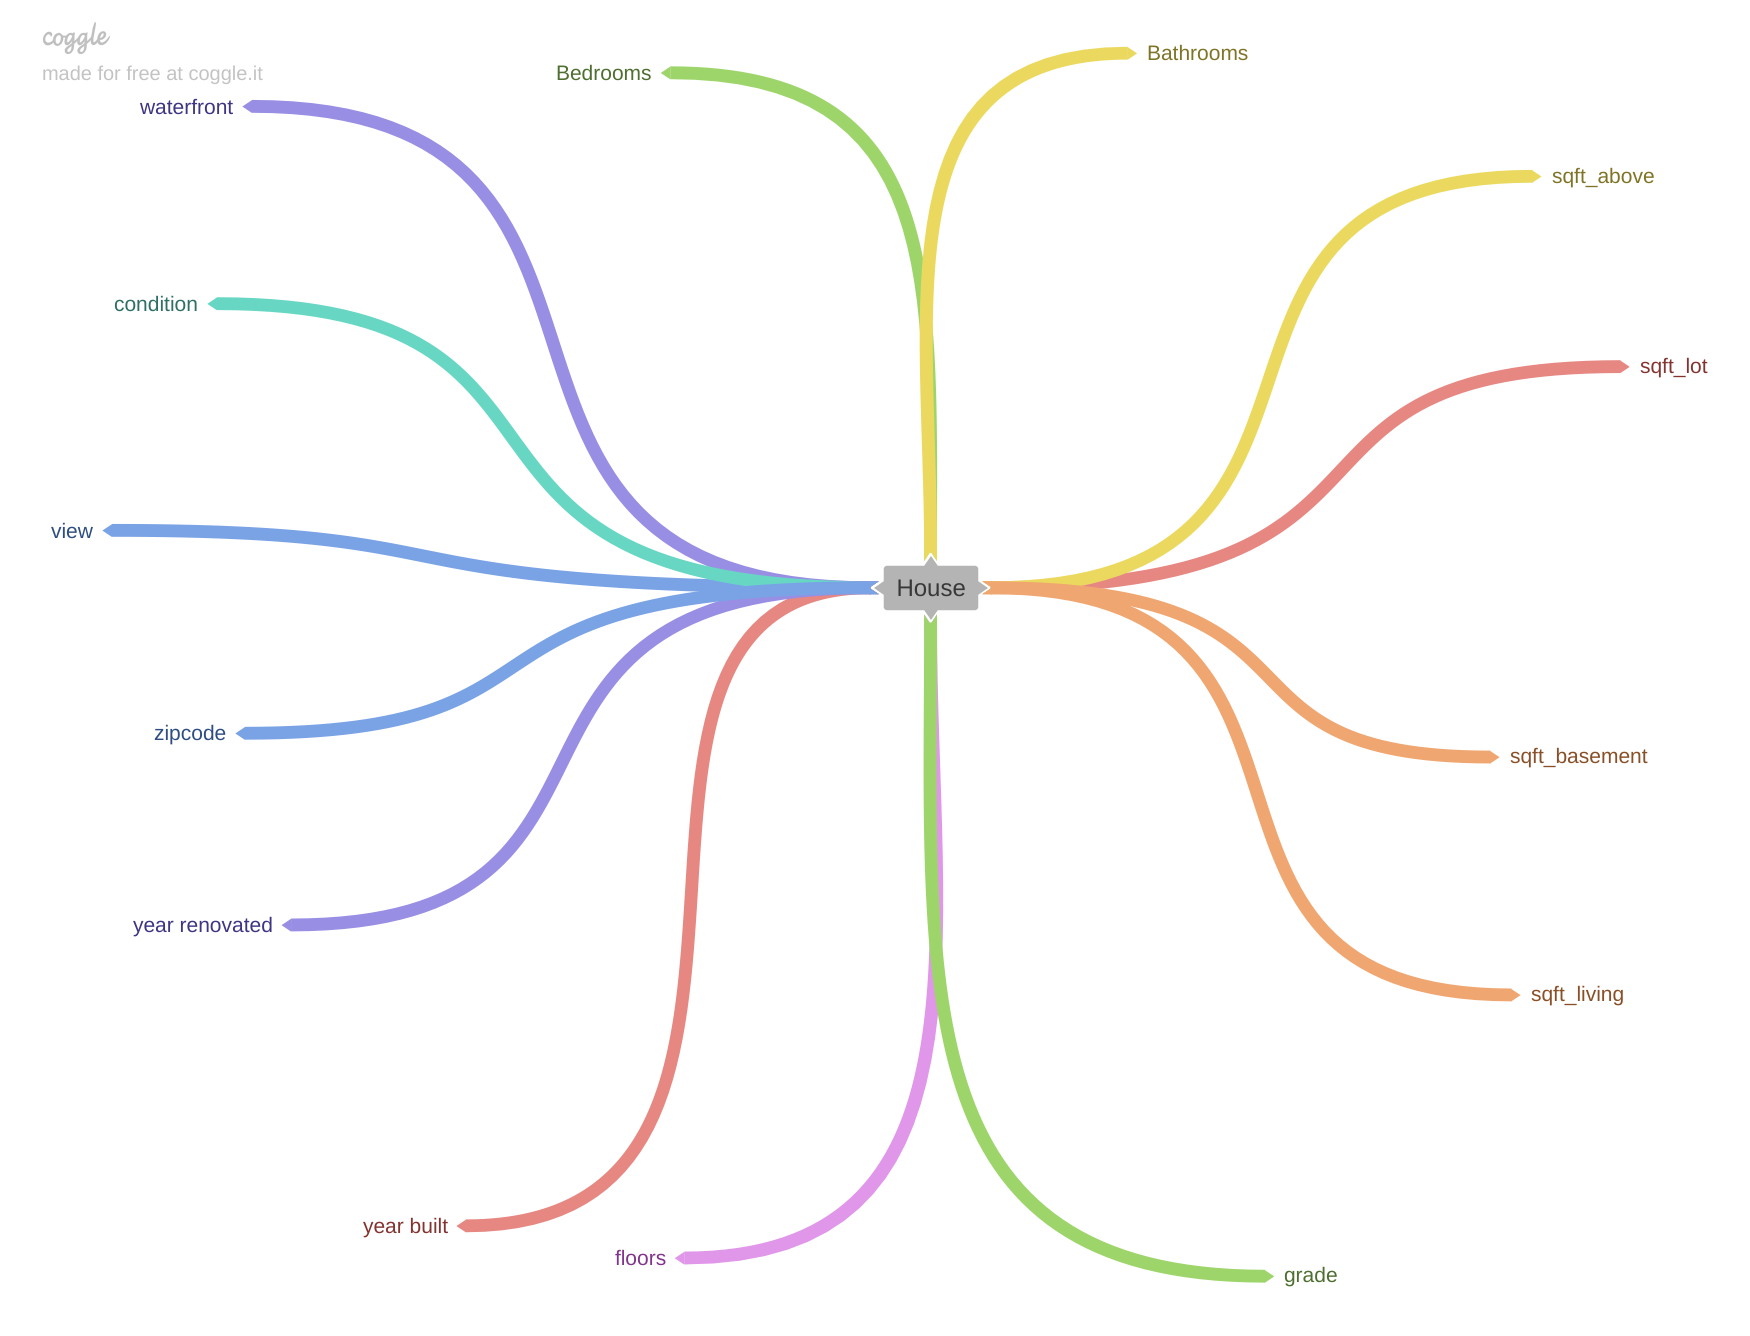

In [16]:
img = Image.open( 'img/House.png')
img

## 2.2 Creating Hypotheses

### H1 - Houses with water views are more expensive on average
**True**

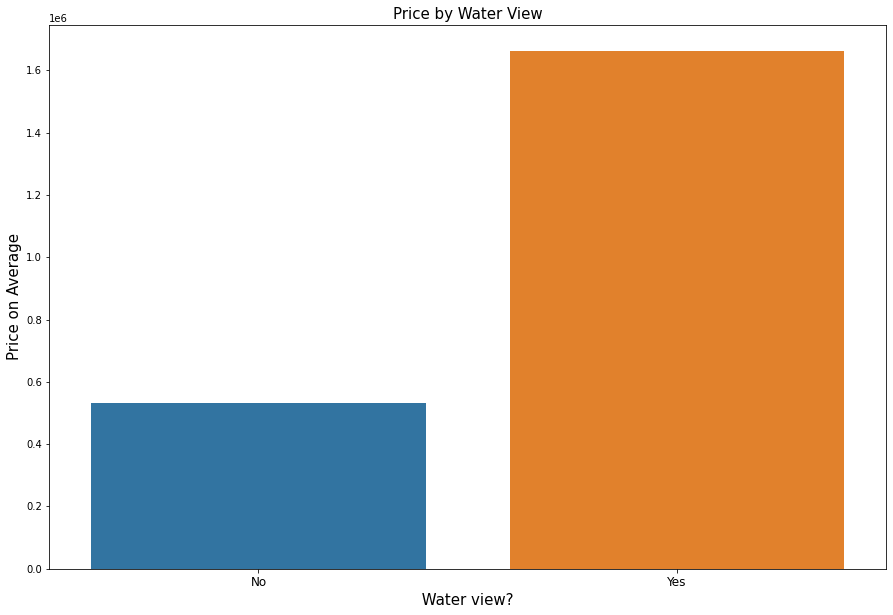

In [30]:
aux1 = df2[['price','waterfront']].groupby( 'waterfront' ).mean().reset_index()

plt.figure(figsize=(15,10))

sns.barplot(x='waterfront', y ='price' , data= aux1);

plt.title("Price by Water View", fontsize = 15 );
plt.xlabel(" Water view? ", fontsize = 15 );
plt.xticks( ticks=[0,1], labels=['No','Yes'], fontsize = 12 );
plt.ylabel("Price on Average", fontsize = 15 );





### H2 - Houses with a construction date less than 1955 are 50% cheaper on average.
**False**

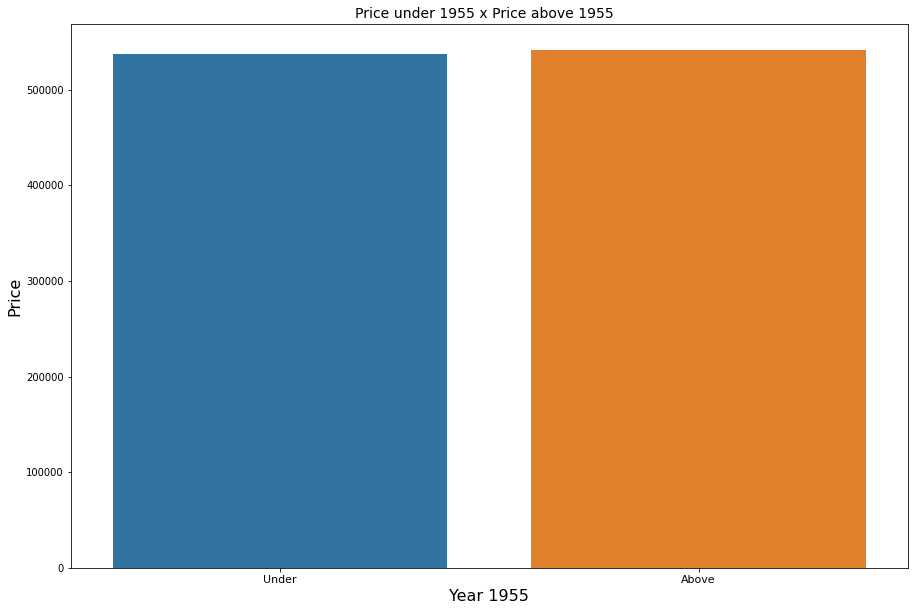

In [18]:
df2['year_1955'] = df2.apply( (lambda x: 0 if x['yr_built'] < 1955 else 1 ), axis = 1 )

aux2 = df2[['price','year_1955']].groupby( 'year_1955' ).mean().reset_index()


plt.figure( figsize=[15,10])
sns.barplot(x = 'year_1955' , y='price', data=aux2 );
plt.title( "Price under 1955 x Price above 1955  ", fontsize=14 );
plt.ylabel( "Price", fontsize = 16 );
plt.xlabel( "Year 1955", fontsize = 16 );
plt.xticks( ticks=[0,1], labels=['Under' , 'Above'], fontsize=11 );



### H3 - The growth in the price of houses year over year is 10%
**False**

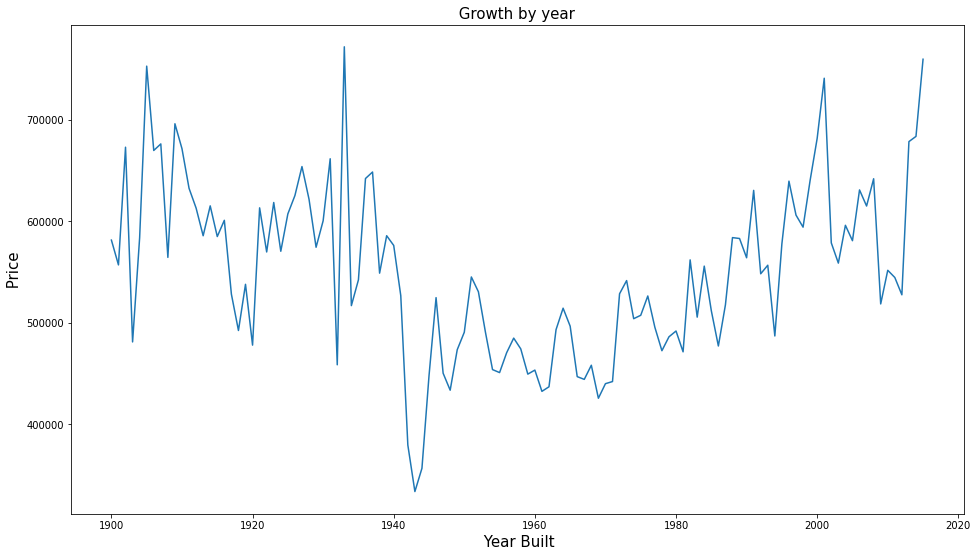

In [19]:
aux3 = df2[['price','yr_built']].groupby( 'yr_built' ).mean().reset_index()

plt.figure( figsize = (16,9) )
sns.lineplot( data= aux3, x='yr_built' , y='price' );
plt.title(" Growth by year ", fontsize = 15);
plt.ylabel(" Price " , fontsize = 15);
plt.xlabel(" Year Built" , fontsize = 15);

###  H4 - Houses with more rooms are more expensive on average
Values grow from 1 to 8


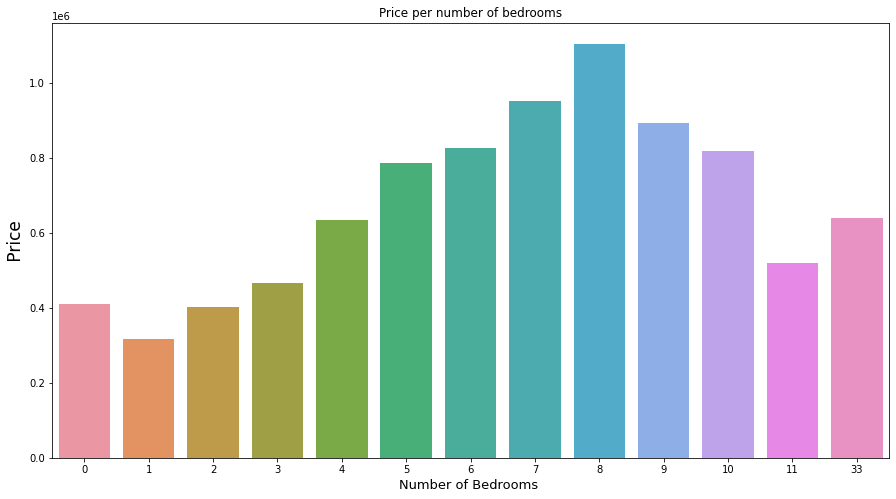

In [20]:
aux4 =df2[['bedrooms','price']].groupby( 'bedrooms' ).mean().reset_index()

plt.figure( figsize=(15, 8 ) )
sns.barplot( x = 'bedrooms', y = 'price', data = aux4 );
plt.title( "Price per number of bedrooms" );
plt.xlabel( "Number of Bedrooms ", fontsize = 13 );
plt.ylabel( " Price ", fontsize = 17 );




### H5 -  houses with 3 bathrooms have a MoM (Month over Month) growth of 15%
**False**

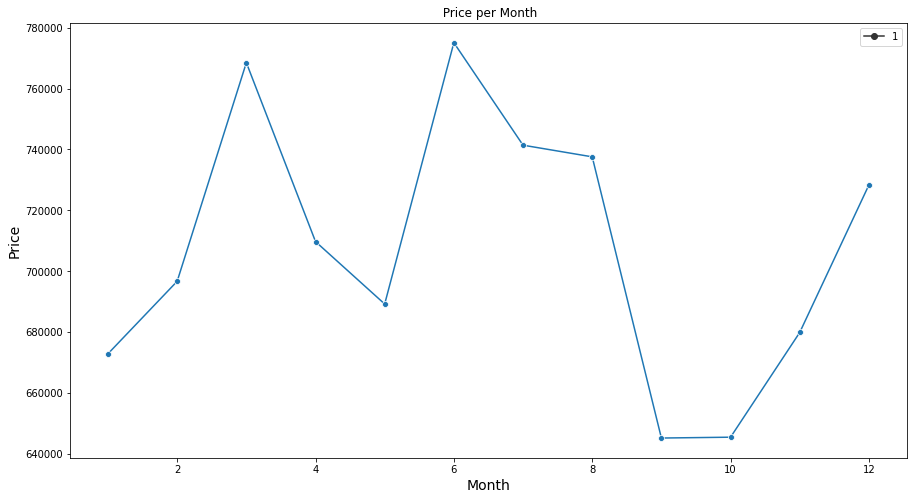

In [21]:
aux51 = df2[df2['bathrooms'] == 3 ]
aux5 = aux51[['price','month']].groupby( 'month' ).mean().reset_index()

plt.figure( figsize=(15, 8))
sns.lineplot(x = 'month', y = 'price' , data=aux5, markers = True, style = (1) );
plt.xlabel( "Month", fontsize = 14 );
plt.ylabel( "Price", fontsize = 14 );
plt.title(" Price per Month");